In [29]:
# Import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import IFrame
import folium
from folium.plugins import MarkerCluster
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error,  r2_score
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeRegressor




In [30]:
#import the dataset
df = pd.read_csv('/Users/uzma/desktop/motor_crash_collision_data.csv')
display(df.tail(20))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
2051560,12/08/2023,13:40,BROOKLYN,11215.0,40.672665,-73.988280,"(40.672665, -73.98828)",NaN,NaN,242 6 STREET,...,Unspecified,NaN,NaN,NaN,4688332,Station Wagon/Sport Utility Vehicle,Box Truck,NaN,NaN,NaN
2051561,12/09/2023,22:10,NaN,NaN,NaN,NaN,NaN,TRIBOROUGH BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4688093,l1,Sedan,NaN,NaN,NaN
2051562,12/16/2023,22:03,QUEENS,11427.0,40.726227,-73.756714,"(40.726227, -73.756714)",GRAND CENTRAL PARKWAY,CLEARVIEW EXPRESSWAY,NaN,...,Unspecified,NaN,NaN,NaN,4687670,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
2051563,12/16/2023,12:21,QUEENS,11432.0,40.717800,-73.803580,"(40.7178, -73.80358)",82 ROAD,164 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4687598,Sedan,E-Scooter,NaN,NaN,NaN
2051564,12/09/2023,22:20,MANHATTAN,10016.0,40.740530,-73.975900,"(40.74053, -73.9759)",NaN,NaN,491 1 AVENUE,...,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,4688132,Sedan,Sedan,Sedan,NaN,NaN
2051565,12/16/2023,6:20,QUEENS,11354.0,40.763940,-73.828156,"(40.76394, -73.828156)",NORTHERN BOULEVARD,UNION STREET,NaN,...,Unspecified,NaN,NaN,NaN,4688184,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2051566,12/16/2023,17:04,BROOKLYN,11226.0,40.646923,-73.948180,"(40.646923, -73.94818)",TILDEN AVENUE,EAST 31 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4687761,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2051567,12/16/2023,5:55,NaN,NaN,40.703780,-73.816210,"(40.70378, -73.81621)",VANWYCK EXPRESSWAY,138 STREET,NaN,...,NaN,NaN,NaN,NaN,4687731,Sedan,NaN,NaN,NaN,NaN
2051568,12/16/2023,11:50,MANHATTAN,10035.0,40.798275,-73.933740,"(40.798275, -73.93374)",NaN,NaN,2330 1 AVENUE,...,Unspecified,NaN,NaN,NaN,4688151,Sedan,Sedan,NaN,NaN,NaN
2051569,12/15/2023,15:50,MANHATTAN,10032.0,40.831960,-73.943900,"(40.83196, -73.9439)",NaN,NaN,525 WEST 155 STREET,...,Unspecified,NaN,NaN,NaN,4688320,Sedan,Sedan,NaN,NaN,NaN


In [31]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [32]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           638220
ZIP CODE                          638468
LATITUDE                          232153
LONGITUDE                         232153
LOCATION                          232153
ON STREET NAME                    433962
CROSS STREET NAME                 772282
OFF STREET NAME                  1709991
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6609
CONTRIBUTING FACTOR VEHICLE 2     315769
CONTRIBUTING FACTOR VEHICLE 3    1905498
CONTRIBUTING FACTOR VEHICLE 4    2018716
CONTRIBUTING FACTOR VEHICLE 5    2042686
COLLISION_ID                           0
VEHICLE TYPE COD

## Data Preprocessing


In [33]:
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['CRASH_DATE', 'CRASH_TIME', 'BOROUGH', 'ZIP_CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME',
       'OFF_STREET_NAME', 'NUMBER_OF_PERSONS_INJURED',
       'NUMBER_OF_PERSONS_KILLED', 'NUMBER_OF_PEDESTRIANS_INJURED',
       'NUMBER_OF_PEDESTRIANS_KILLED', 'NUMBER_OF_CYCLIST_INJURED',
       'NUMBER_OF_CYCLIST_KILLED', 'NUMBER_OF_MOTORIST_INJURED',
       'NUMBER_OF_MOTORIST_KILLED', 'CONTRIBUTING_FACTOR_VEHICLE_1',
       'CONTRIBUTING_FACTOR_VEHICLE_2', 'CONTRIBUTING_FACTOR_VEHICLE_3',
       'CONTRIBUTING_FACTOR_VEHICLE_4', 'CONTRIBUTING_FACTOR_VEHICLE_5',
       'COLLISION_ID', 'VEHICLE_TYPE_CODE_1', 'VEHICLE_TYPE_CODE_2',
       'VEHICLE_TYPE_CODE_3', 'VEHICLE_TYPE_CODE_4', 'VEHICLE_TYPE_CODE_5'],
      dtype='object')

## Check for missing value

In [34]:
df.isnull().sum()

CRASH_DATE                             0
CRASH_TIME                             0
BOROUGH                           638220
ZIP_CODE                          638468
LATITUDE                          232153
LONGITUDE                         232153
LOCATION                          232153
ON_STREET_NAME                    433962
CROSS_STREET_NAME                 772282
OFF_STREET_NAME                  1709991
NUMBER_OF_PERSONS_INJURED             18
NUMBER_OF_PERSONS_KILLED              31
NUMBER_OF_PEDESTRIANS_INJURED          0
NUMBER_OF_PEDESTRIANS_KILLED           0
NUMBER_OF_CYCLIST_INJURED              0
NUMBER_OF_CYCLIST_KILLED               0
NUMBER_OF_MOTORIST_INJURED             0
NUMBER_OF_MOTORIST_KILLED              0
CONTRIBUTING_FACTOR_VEHICLE_1       6609
CONTRIBUTING_FACTOR_VEHICLE_2     315769
CONTRIBUTING_FACTOR_VEHICLE_3    1905498
CONTRIBUTING_FACTOR_VEHICLE_4    2018716
CONTRIBUTING_FACTOR_VEHICLE_5    2042686
COLLISION_ID                           0
VEHICLE_TYPE_COD

##  Group by Borough and suming total killed and injured


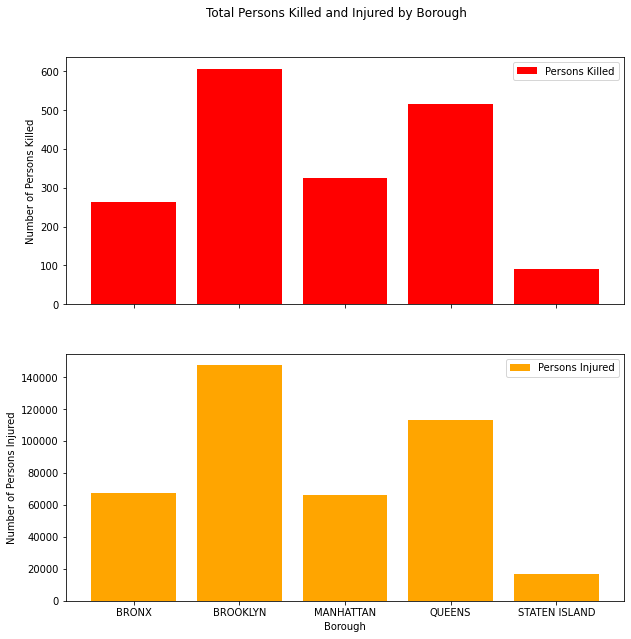

In [35]:
Borough_group = df.groupby('BOROUGH').agg({'NUMBER_OF_PERSONS_KILLED': 'sum', 'NUMBER_OF_PERSONS_INJURED': 'sum'})


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

ax1.bar(Borough_group.index, Borough_group['NUMBER_OF_PERSONS_KILLED'], color='red', label='Persons Killed')
ax1.set_ylabel('Number of Persons Killed')
ax1.legend()

ax2.bar(Borough_group.index, Borough_group['NUMBER_OF_PERSONS_INJURED'], color='orange', label='Persons Injured')
ax2.set_ylabel('Number of Persons Injured')
ax2.legend()

plt.xlabel('Borough')
plt.suptitle('Total Persons Killed and Injured by Borough', y=0.95)
plt.show()

In [36]:
Injured_pcts = Borough_group.NUMBER_OF_PERSONS_INJURED/Borough_group.NUMBER_OF_PERSONS_INJURED.sum()
print("Injured % by borough")
Injured_pcts

Injured % by borough


BOROUGH
BRONX            0.164748
BROOKLYN         0.358618
MANHATTAN        0.160993
QUEENS           0.274795
STATEN ISLAND    0.040846
Name: NUMBER_OF_PERSONS_INJURED, dtype: float64

In [37]:
killd_pcts = Borough_group.NUMBER_OF_PERSONS_KILLED/Borough_group.NUMBER_OF_PERSONS_KILLED.sum()
print("Killed % by borough")
killd_pcts

Killed % by borough


BOROUGH
BRONX            0.146341
BROOKLYN         0.335920
MANHATTAN        0.180155
QUEENS           0.286585
STATEN ISLAND    0.050998
Name: NUMBER_OF_PERSONS_KILLED, dtype: float64

## Group by month summing total killed and injured

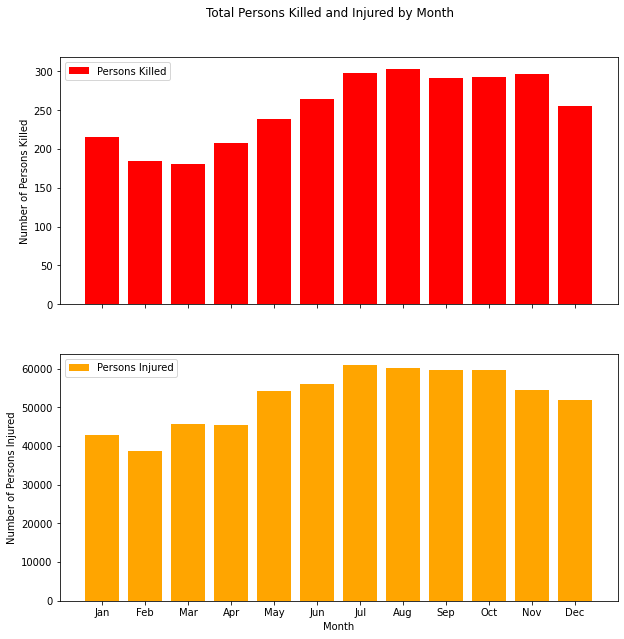

In [38]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])
group_month = df.groupby(df['CRASH_DATE'].dt.month).agg({
    'NUMBER_OF_PERSONS_KILLED': 'sum',
    'NUMBER_OF_PERSONS_INJURED': 'sum'
})

# Changing the name of the month number to month name
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
group_month.index = month

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Bar plot for persons killed
ax1.bar(group_month.index, group_month['NUMBER_OF_PERSONS_KILLED'], color='red', label='Persons Killed')
ax1.set_ylabel('Number of Persons Killed')
ax1.legend()

# Bar plot for persons injured
ax2.bar(group_month.index, group_month['NUMBER_OF_PERSONS_INJURED'], color='orange', label='Persons Injured')
ax2.set_ylabel('Number of Persons Injured')
ax2.legend()

plt.xlabel('Month')
plt.suptitle('Total Persons Killed and Injured by Month', y=0.95)
plt.show()